## COMP5122M: Data Science

## Group project (Coursework 1): Data Science Project


# Understanding The Impact of Social Isolation and Loneliness in a Game Environment

Group member names
* Maulood Ahmad, tmpk8177@leeds.ac.uk
* Nyayesh Seyf, mwpw2517@leeds.ac.uk
* Stan Kilburn, kmgc7321@leeds.ac.uk
* Bhargav Kumar Nath, vnnh7247@leeds.ac.uk

# Dataset Description

The dataset focuses on the **behavioral and perceptual aspects of game players during the COVID-19 pandemic**, offering insights into how gaming was used as a coping mechanism for social isolation. It contains information about **640 Animal Crossing: New Horizons (ACNH) players** from **29 countries**, categorized into six major components:
1. **Socio-demographic profile:** Captures player demographics such as age, gender, and location.  
2. **COVID-19 concern:** Assesses players' concerns about the pandemic and its impact.  
3. **Environmental perception:** Evaluates players’ views on environmental issues, including attitudes toward human-centeredness, measured using the New Ecological Paradigm Scale.  
4. **Game-playing habits:** Examines frequency, duration, and patterns of gameplay during isolation.  
5. **In-game behaviors:** Investigates activities such as virtual travel and social gifting, which simulate real-world social and recreational experiences.  
6. **Game-playing feelings:** Explores the emotional impact of gaming, such as feelings of connection, stress relief, or escapism. 





## Assessment Tasks

#### a) Exploratory Data Analysis (EDA)

The EDA will focus on comprehensive investigation of player isolation characteristics through multiple perspectives:

1. **Distribution of Self-Isolation/Social Distancing Duration**
   - Analyze the overall temporal pattern of player isolation periods
   - Create visualizations showing frequency and spread of isolation lengths

2. **Regional Breakdown of Isolation Periods**
   - Examine how isolation duration varies across different regions
   - Develop comparative visualizations to highlight regional differences

3. **Correlation between Isolation Duration and Game-Playing Frequency**
   - Investigate potential relationships between time spent in isolation and gaming habits
   - Use statistical techniques to quantify and visualize these connections

4. **Comparative Analysis: Isolation Length and "Lost Connection" Sentiment**
   - Explore the correlation between isolation duration and players' feelings of disconnection
   - Analyze the frequency and intensity of the "lost connection" response across different isolation periods

#### b) In-Game Behavior Indicators

**Objective:** Identify and rank the most significant in-game behavioral markers that correlate with isolation duration:

#### c) Predictive Machine Learning Model

# 1. Distribution of Self-Isolation/Social Distancing Duration

In [35]:
import pandas as pd

# Here we read the dataframe using pandas, we choose encoding as latin-1 to specify handle special characters
df = pd.read_csv("data_640_validated.csv", encoding="latin-1")

df.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [36]:
# Dropping the non-required columns
df.drop(["Unnamed: 0", "ï..O1"], axis=1, inplace=True)

In [37]:
df.sample(6)

,A1_1,A1_2,A2,A3,A4,A5,A6,A7,A8,B1,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
161,Filipino,Asia,Female,Undergraduate school,NaN,22,Asian,"Single, never married",Out of work but not currently looking for work,Yes,...,1,1,5,4,4,5,1,5,3,1
96,White British,EU,Female,Undergraduate school,NaN,21,White,"Single, never married",Unable to work,Yes,...,1,1,4,3,5,3,2,4,2,3
591,Irish,EU,Female,Undergraduate school,Both,34,White,Married or domestic partnership,Self-employed,Yes,...,3,1,3,2,4,2,2,2,1,2
423,Filipino,Asia,Male,Graduate school and higher,NaN,28,Asian,"Single, never married",Employed for wages,Yes,...,5,5,2,5,5,5,4,5,4,1
202,American,US/Canada,Female,Undergraduate school,A pet,23,Hispanic or Latino,"Single, never married",Out of work and looking for work,Yes,...,3,2,4,4,4,4,2,4,4,2
613,usa,US/Canada,Male,Graduate school and higher,Both,36,White,Married or domestic partnership,Employed for wages,No,...,4,4,4,4,2,3,4,4,4,5


In [38]:
# Checking for unique values in column `B2`
print("Unique values in 'B2':", df["B2"].unique())

Unique values in 'B2': ['More than a month' 'More than 3 weeks'
 'No self-isolation/social distancing' 'More than 2 weeks'
 'More than a week' '1 day' '5 days' '3 days' '6 days' '4 days' '7 days']


In [39]:
# Check for missing values in column 'B2'
print("Missing values in 'B2':", df["B2"].isnull().sum())

Missing values in 'B2': 0


In [40]:
import pandas as pd

def clean_duration(value):
    """
    Standardize duration values by converting weeks, months, and days to days.
    Includes explicit handling for 'No self-isolation/social distancing'.
    
    Args:
        value (str): Duration value to clean.
    
    Returns:
        int or None: Cleaned duration value in days, or None if invalid.
    """
    # Check for missing values
    if pd.isnull(value):
        return None
    
    # Convert value to lowercase and strip extra spaces
    value = str(value).strip().lower()

    try:
        # Explicitly handle "No self-isolation/social distancing"
        if value == "no self-isolation/social distancing":
            return 0
        
        # Handle day values and specific cases
        if value == '1 day':
            return 1
        elif value == '3 days':
            return 1
        elif value == '4 days':
            return 1
        elif value == '5 days':
            return 1
        elif value == '6 days':
            return 1
        elif value == '7 days':
            return 1
        
        # Handle more than a week cases
        if "more than a week" in value:
            return 2
        
        # Handle more than 2 weeks
        if "more than 2 weeks" in value:
            return 3
        
        # Handle more than 3 weeks
        if "more than 3 weeks" in value:
            return 4
        
        # Handle more than a month
        if "more than a month" in value:
            return 5
        
        # Return None for unsupported duration units
        return None
        
    except ValueError:
        # Return None for invalid values
        return None

# Apply cleaning function to the "B2" column
df["B2_cleaned"] = df["B2"].apply(clean_duration)   

# Remove rows with missing cleaned values
df_cleaned = df.dropna(subset=["B2_cleaned"])

# Display cleaned data
print(df_cleaned[["B2", "B2_cleaned"]].head())

# Optionally check value counts to see how many of each category you have
print(df_cleaned["B2_cleaned"].value_counts())


                  B2  B2_cleaned
0  More than a month           5
1  More than a month           5
2  More than a month           5
3  More than a month           5
4  More than 3 weeks           4
B2_cleaned
5    403
0    111
4     45
3     42
2     20
1     19
Name: count, dtype: int64


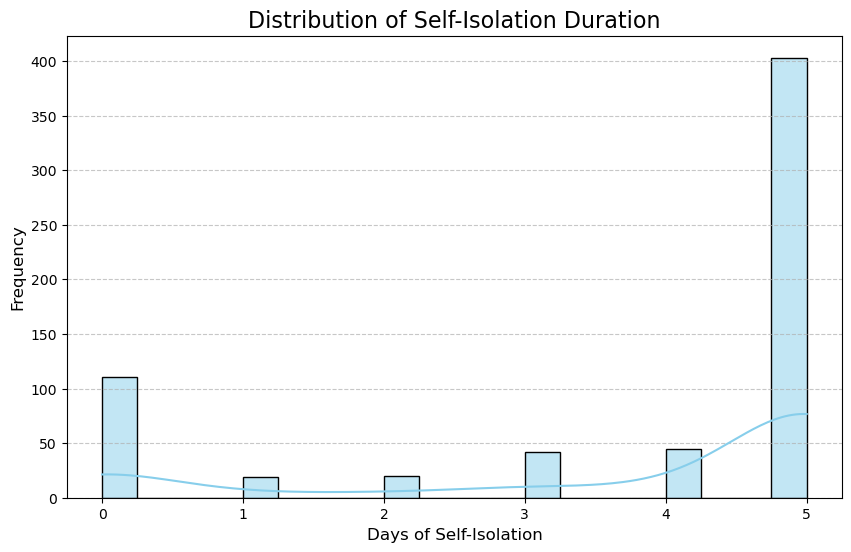

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram, bins specifies number of equal width bins to divide the data into
# kde plots the probability density function
plt.figure(figsize=(10, 6))
sns.histplot(df["B2_cleaned"], bins=20, kde=True, color="skyblue")

# Customizable plot title and labels
plt.title("Distribution of Self-Isolation Duration", fontsize=16)
plt.xlabel("Days of Self-Isolation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The histogram shows a highly skewed distribution, with a large peak around 30 days of self isolation. This indicated that many players spent close to a month in isolation

In [42]:
# Calculate basic statistics
print("Summary statistics for self-isolation duration (in days):")
print(df_cleaned["B2_cleaned"].describe())

Summary statistics for self-isolation duration (in days):
count    640.000000
mean       3.718750
std        1.946617
min        0.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: B2_cleaned, dtype: float64


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Filter relevant columns (E1 to E28)
behavior_columns = [
    'E1', 'E2', 'E3', 'E4', 'E5',  # Various in-game activities
    'E6', 'E7', 'E8', 'E9',  # Collection desires
    'E10', 'E11', 'E12', 'E13', 'E14',  # Activities with fish/bugs
    'E15', 'E16', 'E17', 'E18', 'E19',  # Tree-related activities
    'E20', 'E21', 'E22', 'E23', 'E24',  # Flower-related activities
    'E25', 'E26', 'E27', 'E28'  # Mystery Island activities
]

# Prepare featurs and target
X = df_cleaned[behavior_columns]
y = df_cleaned["B2_cleaned"]

In [44]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=43)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=43)

In [46]:
# Predict and evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = rf_classifier.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.3f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.21        22
           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         5
           3       1.00      0.20      0.33         5
           4       0.40      0.29      0.33         7
           5       0.74      0.98      0.84        85

    accuracy                           0.72       128
   macro avg       0.61      0.39      0.43       128
weighted avg       0.67      0.72      0.65       128


Accuracy: 71.875%


In [47]:
# Predict and evaluate
import numpy as np
feature_importance = pd.DataFrame({
    "feature": behavior_columns,
    "importance": rf_classifier.feature_importances_
}). sort_values("importance", ascending=False)

print("\n Top 10 Most Important features:")
print(feature_importance.head(10))



 Top 10 Most Important features:
   feature  importance
12     E13    0.055412
6       E7    0.042663
13     E14    0.042244
10     E11    0.042154
11     E12    0.041631
23     E24    0.041591
17     E18    0.038791
24     E25    0.038130
16     E17    0.036827
9      E10    0.036034


C:\Users\bharg\AppData\Local\Temp\ipykernel_29012\1260734671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance.head(10),


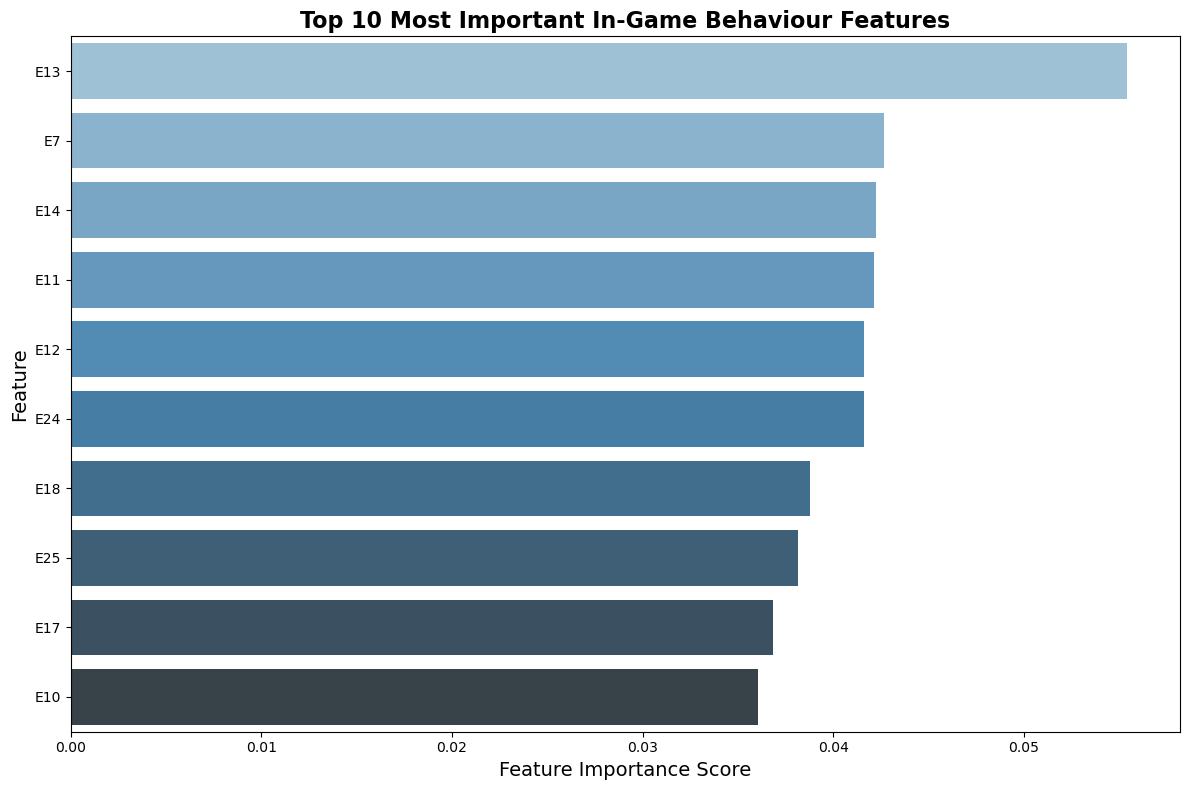

In [48]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance.head(10), 
            palette=sns.color_palette("Blues_d", 10))

plt.title("Top 10 Most Important In-Game Behaviour Features", fontsize=16, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
# Cross validation
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("\nCross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross Validation Scores: [0.6407767  0.66990291 0.62745098 0.6372549  0.6372549 ]
Mean CV Score: 0.6425280791928422


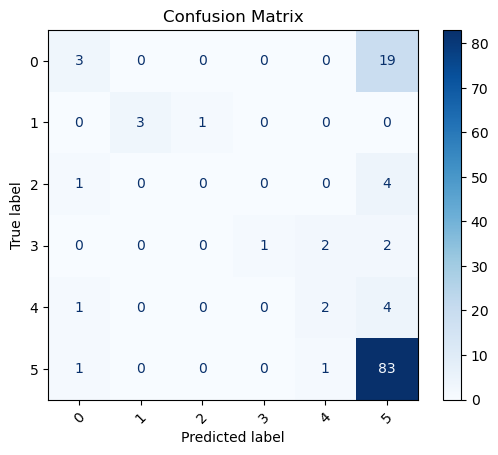

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

# Add title and labels
plt.title("Confusion Matrix")
plt.show()


# With Validation

In [51]:
# Split into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=123)

In [52]:
# SScale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Train the model on the training set
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=32, random_state=43, min_samples_split=4, min_samples_leaf=2)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=32, min_samples_leaf=2, min_samples_split=4,
                       random_state=43)

In [54]:
# Evaluate on the validation set
y_val_pred = rf_classifier.predict(X_val_scaled)
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.30      0.39        20
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        10
           5       0.65      0.96      0.77        76

    accuracy                           0.62       128
   macro avg       0.20      0.21      0.19       128
weighted avg       0.47      0.62      0.52       128



c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
# Test the final model on the test set
y_test_pred = rf_classifier.predict(X_test_scaled)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.09      0.14        22
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.40      0.40      0.40         5
           4       0.50      0.14      0.22         7
           5       0.72      0.96      0.82        85

    accuracy                           0.68       128
   macro avg       0.32      0.27      0.26       128
weighted avg       0.57      0.68      0.60       128



c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bharg\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
# Feature importance
feature_importance = pd.DataFrame({
    "feature": behavior_columns,
    "importance": rf_classifier.feature_importances_
}).sort_values("importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
   feature  importance
12     E13    0.069209
9      E10    0.060128
13     E14    0.048931
24     E25    0.047583
17     E18    0.046523
23     E24    0.043311
6       E7    0.040580
15     E16    0.038991
10     E11    0.038327
3       E4    0.035077


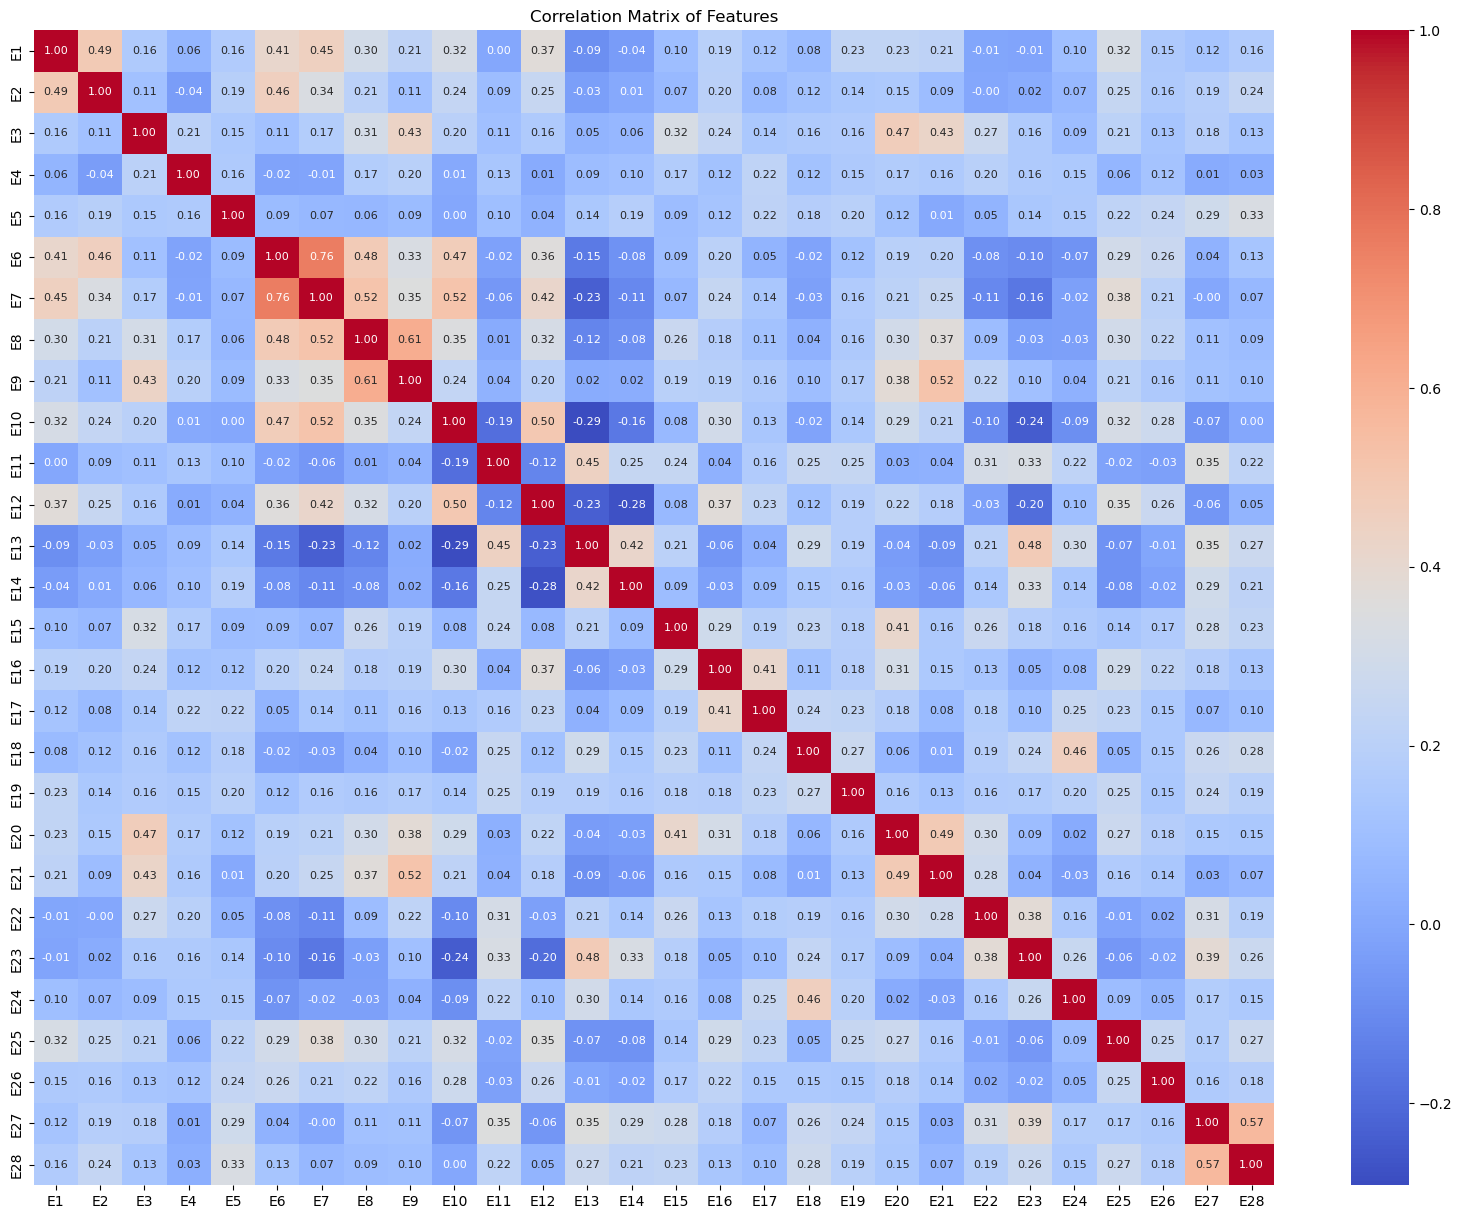

In [57]:
correlation_matrix = X_train_full.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 8})
plt.title("Correlation Matrix of Features")
plt.show()

In [58]:
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("\n Highly Correlated Features: ")
print(highly_correlated_features)


 Highly Correlated Features: 
{'E7'}


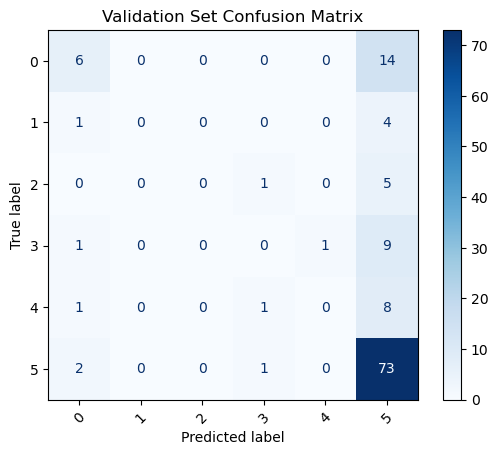

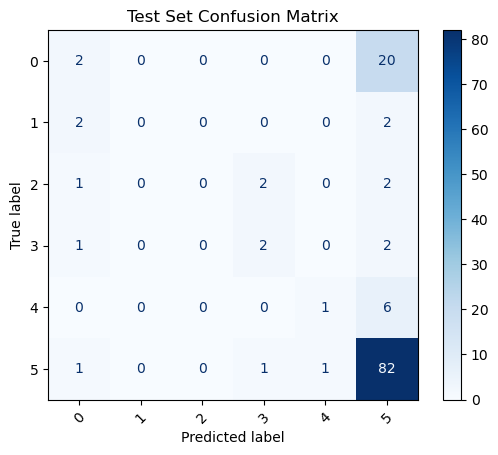

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=rf_classifier.classes_)
disp_val.plot(cmap="Blues", xticks_rotation=45)
plt.title("Validation Set Confusion Matrix")
plt.show()

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_classifier.classes_)
disp_test.plot(cmap="Blues", xticks_rotation=45)
plt.title("Test Set Confusion Matrix")
plt.show()


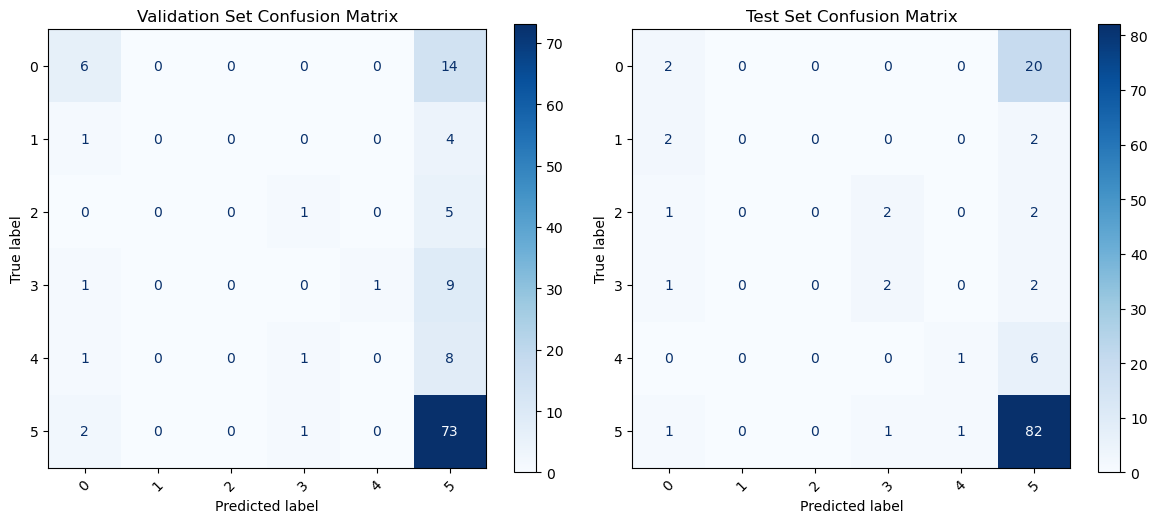

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=rf_classifier.classes_)
disp_val.plot(cmap="Blues", xticks_rotation=45, ax=axes[0])  # Plot on the first subplot
axes[0].set_title("Validation Set Confusion Matrix")

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_classifier.classes_)
disp_test.plot(cmap="Blues", xticks_rotation=45, ax=axes[1])  # Plot on the second subplot
axes[1].set_title("Test Set Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\bharg\AppData\Local\Temp\ipykernel_29012\589408229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature",


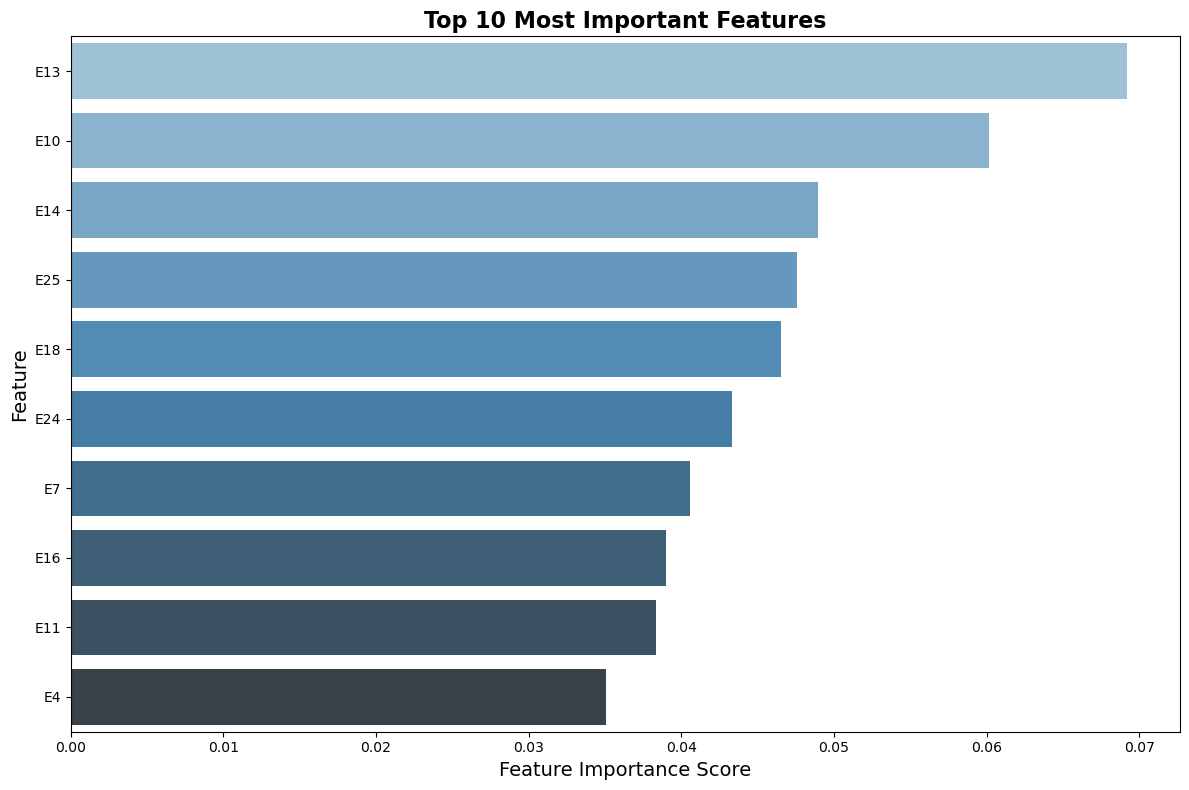


Top 10 Most Important Features:
   feature  importance
12     E13    0.069209
9      E10    0.060128
13     E14    0.048931
24     E25    0.047583
17     E18    0.046523
23     E24    0.043311
6       E7    0.040580
15     E16    0.038991
10     E11    0.038327
3       E4    0.035077


In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate feature importance
feature_importance = pd.DataFrame({
    "feature": behavior_columns,  # Column names
    "importance": rf_classifier.feature_importances_  # Importance scores
}).sort_values("importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", 
            data=feature_importance.head(10), 
            palette=sns.color_palette("Blues_d", 10))

# Customize the plot
plt.title("Top 10 Most Important Features", fontsize=16, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

# Print the top 10 features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
